In [1]:
import pylhe
import ROOT
import math
import os
import pandas as pd
import uproot
import numpy as np
import matplotlib.pyplot as plt
import xlrd


Welcome to JupyROOT 6.20/04


In [2]:
def file_np(file):
    event = [ file["Delphes;1"]["Electron"].array(),
              file["Delphes;1"]["Electron.PT"].array(),
              file["Delphes;1"]["Electron.Eta"].array(),
              file["Delphes;1"]["Electron.Phi"].array(),
              file["Delphes;1"]["Muon"].array(),                #4
              file["Delphes;1"]["Muon.PT"].array(),
              file["Delphes;1"]["Muon.Eta"].array(),
              file["Delphes;1"]["Muon.Phi"].array(),
              file["Delphes;1"]["Photon"].array(),              #8
              file["Delphes;1"]["Photon.PT"].array(),
              file["Delphes;1"]["Photon.Eta"].array(),
              file["Delphes;1"]["Photon.Phi"].array(),
              file["Delphes;1"]["MissingET"].array(),           #12
              file["Delphes;1"]["MissingET.fUniqueID"].array(),   
              file["Delphes;1"]["MissingET.fBits"].array(),
              file["Delphes;1"]["MissingET.MET"].array(),
              file["Delphes;1"]["MissingET.Eta"].array(),
              file["Delphes;1"]["MissingET.Phi"].array(),
              file["Delphes;1"]["Jet"].array(),                 #18
              file["Delphes;1"]["Jet.EhadOverEem"].array(),     
              file["Delphes;1"]["Jet.Mass"].array(),
              file["Delphes;1"]["Event.Number"].array(),
              file["Delphes;1"]["Jet.Tau[5]"].array(),
              file["Delphes;1"]["Event.CrossSection"].array()
              ]
    
    event = np.expand_dims(event, axis=-1)    ### reshape data
    event = event.transpose((1,0,2))
    event = np.squeeze(event,axis=(2,))
    return event 

################################################

def prlen(events):
    print(len(events))

################################################  sel
def num_sl(event,lab,num):
    where1 = np.where(event[:,lab]==num)
    return event[where1]

def l_sl(event):
    where1 = np.where(event[:,0]+event[:,4]==1)
    return event[where1]
       
################################################  maa caculate
def m_aa(events, m, pt1):
    where1=[]   
    for i in range(len(events)):
        p = [0,0,0,0] 
        for j in range(events[i][8]):
            pt = events[i][9][j]   
            eta = events[i][10][j]  
            phi = events[i][11][j]    
            p[1] = p[1] + pt*np.cos(phi)    ### px
            p[2] = p[2] + pt*np.sin(phi)    ### py
            p[3] = p[3] + pt*np.sinh(eta)   ### pz
            p[0] = p[0] + np.sqrt( (pt*np.cos(phi))**2 + (pt*np.sin(phi))**2 + (pt*np.sinh(eta))**2 )     
        maa = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 - p[3]**2)
        m.append(maa)
        pTaa = np.sqrt(p[1]**2 + p[2]**2)
        pt1.append(pTaa)
        if max_d<maa<max_u:
            where1.append(i)
    return events[where1]
################################################        
def pt_sl(events):
    where1=[]
    for i in range(len(events)):
        p = [0,0,0,0]    
        for j in range(events[i][8]):
            pt = events[i][9][j]    
            eta = events[i][10][j]    
            phi = events[i][11][j]   
            p[1] = p[1] + pt*np.cos(phi)    ### px
            p[2] = p[2] + pt*np.sin(phi)    ### py
        pTaa = np.sqrt(p[1]**2 + p[2]**2)    
        if pTaa>50:
              where1.append(i)
    return events[where1]
################################################
def mvl_sl(events,m):
    for i in range(len(events)):
        p = [0,0,0,0]
        if events[i][0]==1:
            pt1  = events[i][1][0]    
            eta1 = events[i][2][0]    
            phi1 = events[i][3][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(me**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 + (pt1*np.sinh(eta1))**2)+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2 + (pt2*np.sinh(eta2))**2)
            mlv = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 - p[3]**2)
        elif events[i][4]==1 :
            pt1  = events[i][5][0]    
            eta1 = events[i][6][0]    
            phi1 = events[i][7][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(mu**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 + (pt1*np.sinh(eta1))**2)+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2 + (pt2*np.sinh(eta2))**2)
            mlv = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 - p[3]**2)
        m.append(mlv)
################################################## must 1l events
def MTvl_sl(events,m,pt):
    where1=[]
    for i in range(len(events)):
        p = [0,0,0,0]
        if events[i][0]==1:
            pt1  = events[i][1][0]    
            eta1 = events[i][2][0]    
            phi1 = events[i][3][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(me**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 )+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2)
            mlv  = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 )
            ptlv = np.sqrt(p[1]**2 + p[2]**2 )
        elif events[i][4]==1 :
            pt1  = events[i][5][0]    
            eta1 = events[i][6][0]    
            phi1 = events[i][7][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(mu**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 )+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2 )
            mlv = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 )
            ptlv = np.sqrt(p[1]**2 + p[2]**2 )
        
        m.append(mlv)
        pt.append(ptlv)
        if mlv > 58:
            where1.append(i)
    return(events[where1])
##################################################   
def PTvl_sl(events,m,pt):
    where1=[]
    for i in range(len(events)):
        p = [0,0,0,0]
        if events[i][0]==1:
            pt1  = events[i][1][0]    
            eta1 = events[i][2][0]    
            phi1 = events[i][3][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(me**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 )+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2)
            mlv  = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 )
            ptlv = np.sqrt(p[1]**2 + p[2]**2 )
        elif events[i][4]==1 :
            pt1  = events[i][5][0]    
            eta1 = events[i][6][0]    
            phi1 = events[i][7][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(mu**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 )+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2 )
            mlv = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 )
            ptlv = np.sqrt(p[1]**2 + p[2]**2 )
        m.append(mlv)
        pt.append(ptlv)
        if ptlv > 50:
            where1.append(i)
    return(events[where1])
########################################################################################
def significance(s,b):   ### t = (sigma b)^2
    t = (b*0.1)**2
    g = 2*((s+b)*np.log((s+b)*(b+t)/(b**2+(s+b)*t))-((b**2)/t)*np.log(1+(t*s/(b*(b+t)))))
    return np.sqrt(g)

def signif_short(s,b):
    return np.sqrt(2*((s+b)*np.log(1+s/b)-s))

########################################################################################
def z_2(f, left, right, epsilon=1e-12):
    if left >= right:
        return None

    while abs(right - left) > epsilon:
        mid = (left + right) / 2
        f_mid = f(mid,b)-2
        if f_mid == 0:
            return mid
        elif f_mid < 0:
            left = mid
        elif f_mid > 0:
            right = mid

    return (left + right) / 2

In [3]:

############################################ chose the point

m_axlist = [100,80,65,50,40,30]
x_seclist = [4584, 5583, 6640, 7858, 8969, 10220]

###################### fa,gaww
fa_limt_300 = []
fa_limt_3000 = []
gaww_limt_300 = []
gaww_limt_3000 = []

s_fa_limt_300 = []
s_fa_limt_3000 = []
s_gaww_limt_300 = []
s_gaww_limt_3000 = []
###################### s,b
L300s = []
L3000s = []
L300b = []
L3000b = []

######################################## s = sg_Xsection*(sgsl_event/sgNsl_event)*Lum[k]             
s_list_300 = []     
s_list_3000 = [] 
b_list_300 = []
b_list_3000 = []




bg_file = uproot.open("/data/event/final/bg_ppaalvll/Events/run_01/tag_1_delphes_events.root")
bg_events = file_np(bg_file)
for i in range(len(m_axlist)):
    sg_file = uproot.open(f"/data/event/final/sg_{m_axlist[i]}ppwax/Events/run_01/tag_1_delphes_events.root") 
    m_ax = m_axlist[i]
    bg_Xsection = 94.37
    sg_Xsection = x_seclist[i]   #fb = pb*1000

    # bg_x : 94.37
    # sg_x : 100(4584) 90(5059) 80(5583) 70(6252) 60(6998) 50(7858) 40(8969) 30(10220) |25(10890)
    
    sg_events = file_np(sg_file)
    ################################################
    me = 0.000511
    mu = 0.10566


    max_shift = m_ax*0.1
    max_u = m_ax + max_shift
    max_d = m_ax - max_shift
    ####################################################################################### two_a , 1_l , maa , pt sel
    sgsl_2a = num_sl(sg_events,8,2)
    sgsl_2a_1l = l_sl(sgsl_2a)
    bgsl_2a = num_sl(bg_events,8,2)
    bgsl_2a_1l = l_sl(bgsl_2a)
    ####################### drow picture use
    maa_sgsl_2a_1l=[]
    pt_sgsl_2a_1l=[]
    maa_bgsl_2a_1l=[]
    pt_bgsl_2a_1l=[]

    ################################## maa sl result (drow pic)
    sgsl_2a_1l_msl = m_aa(sgsl_2a_1l,maa_sgsl_2a_1l,pt_sgsl_2a_1l)   ###msl   90<max<110
    bgsl_2a_1l_msl = m_aa(bgsl_2a_1l,maa_bgsl_2a_1l,pt_bgsl_2a_1l) 

    ################################## pTaa sl
    sgsl_2a_1l_pt = pt_sl(sgsl_2a_1l)
    bgsl_2a_1l_pt = pt_sl(bgsl_2a_1l)

    ############################################################################## PT(lvl) MT(lvl)
    MTvlsgsl_2a_1l_pt=[]
    MTvlbgsl_2a_1l_pt=[]
    PTvlsgsl_2a_1l_pt=[]
    PTvlbgsl_2a_1l_pt=[]

    sgsl_2a_1l_pt_PTsl = PTvl_sl(sgsl_2a_1l_pt, MTvlsgsl_2a_1l_pt, PTvlsgsl_2a_1l_pt)
    bgsl_2a_1l_pt_PTsl = PTvl_sl(bgsl_2a_1l_pt, MTvlbgsl_2a_1l_pt, PTvlbgsl_2a_1l_pt)

    sgsl_2a_1l_pt_PTsl_MTsl = MTvl_sl(sgsl_2a_1l_pt_PTsl, MTvlsgsl_2a_1l_pt, PTvlsgsl_2a_1l_pt)
    bgsl_2a_1l_pt_PTsl_MTsl = MTvl_sl(bgsl_2a_1l_pt_PTsl, MTvlbgsl_2a_1l_pt, PTvlbgsl_2a_1l_pt)

    ##############################################################################
    maa_sgsl_2a_1l_pt_PTsl_MTsl=[]
    pt_sgsl_2a_1l_pt_PTsl_MTsl=[]
    maa_bgsl_2a_1l_pt_PTsl_MTsl=[]
    pt_bgsl_2a_1l_pt_PTsl_MTsl=[]

    sgsl_2a_1l_pt_PTsl_MTsl_msl = m_aa(sgsl_2a_1l_pt_PTsl_MTsl,maa_sgsl_2a_1l_pt_PTsl_MTsl,pt_sgsl_2a_1l_pt_PTsl_MTsl)   # final sl  sgsl_2a_1l_pt_msl
    bgsl_2a_1l_pt_PTsl_MTsl_msl = m_aa(bgsl_2a_1l_pt_PTsl_MTsl,maa_bgsl_2a_1l_pt_PTsl_MTsl,pt_bgsl_2a_1l_pt_PTsl_MTsl)   # final sl  bgsl_2a_1l_pt_msl

    ##############################################################################

    bgsl_event = len(bgsl_2a_1l_pt_PTsl_MTsl_msl)
    sgsl_event = len(sgsl_2a_1l_pt_PTsl_MTsl_msl)
    bgNsl_event = len(bg_events)
    sgNsl_event = len(sg_events)

    C_W = 2
    C_B = 1
    fa = 1000
    sin_w_2 = 0.22290
    cos_w_2 = 1 - sin_w_2

    Lum = [300,3000]
    
    
    print('M_ax=',m_axlist[i])
    print('\033[0;33msg sl :\033[0m',len(sgsl_2a_1l_pt_PTsl_MTsl_msl))
    print('\033[0;34mbg sl :\033[0m',len(bgsl_2a_1l_pt_PTsl_MTsl_msl))
    
    
####################################################################################    
    for k in range(len(Lum)):

        s = sg_Xsection*(sgsl_event/sgNsl_event)*Lum[k]
        b = bg_Xsection*(bgsl_event/bgNsl_event)*Lum[k]

############################################################### s , b list
        if k == 0:
            print('\033[0;33ms_300 :\033[0m',s)
            print('\033[0;34mb_300 :\033[0m',b)
            s_list_300.append(s)
            b_list_300.append(b)
        elif k == 1:       
            print('\033[0;33ms_3000 :\033[0m',s)
            print('\033[0;34mb_3000 :\033[0m',b)
            s_list_3000.append(s)
            b_list_3000.append(b)
############################################################### 
        if k == 0:
            L300s.append(s)
            L300b.append(b)
        elif k == 1:
            L3000s.append(s)
            L3000b.append(b)
###############################################################     
        
        for j in range(0,10000):
            if 1>significance(j,b)-2>0:
                max_n = j
    #           print(significance(i,b))
                break

        max_n = max_n        
        min_n = max_n - 1

        exp_s = z_2(significance, min_n, max_n)  ###  exp_s=3 
        exp_sg_Xsection = (exp_s*sg_Xsection/s)

        print('\033[0;36mLuminosity:',Lum[k],'\033[0m')
#         print('sg_Xsection:',sg_Xsection)
#         print('z:',significance(s,b))
#         print('exp_z:',significance(exp_s,b))
        print('exp_s:',exp_s)
#         print('exp_sg_Xsection:',exp_sg_Xsection)

        fa_limit = fa*np.sqrt(sg_Xsection/exp_sg_Xsection)
        gaww_limt = (4*C_W)/fa_limit
        if k == 0:
            fa_limt_300.append(fa_limit)
            gaww_limt_300.append(gaww_limt)
        elif k == 1:
            fa_limt_3000.append(fa_limit)
            gaww_limt_3000.append(gaww_limt)
            
        print('fa_limit',fa_limit)
        print('gaww_limt',gaww_limt)
    print('*********************************')
############################################################################## 
    for k in range(len(Lum)):

        s = sg_Xsection*(sgsl_event/sgNsl_event)*Lum[k]
        b = bg_Xsection*(bgsl_event/bgNsl_event)*Lum[k]

        for i in range(0,10000):
            if 1>signif_short(i,b)-2>0:
                max_n = i
    #           print(significance(i,b))
                break

        max_n = max_n        
        min_n = max_n - 1

        exp_s = z_2(signif_short, min_n, max_n)  ###  exp_s=3 
        exp_sg_Xsection = (exp_s*sg_Xsection/s)

        print('\033[0;36mshort_sign-Luminosity:',Lum[k],'\033[0m')
    #     print('sg_Xsection:',sg_Xsection)
    #     print('z:',significance(s,b))
    #     print('exp_z:',significance(exp_s,b))
        print('exp_s:',exp_s)
    #     print('exp_sg_Xsection:',exp_sg_Xsection)

        fa_limit = fa*np.sqrt(sg_Xsection/exp_sg_Xsection)
        gaww_limt = (4*C_W)/fa_limit
        if k == 0:
            s_fa_limt_300.append(fa_limit)
            s_gaww_limt_300.append(gaww_limt)
        elif k == 1:
            s_fa_limt_3000.append(fa_limit)
            s_gaww_limt_3000.append(gaww_limt)
    
        print('fa_limit',fa_limit)
        print('gaww_limt',gaww_limt)
        
    
    print('******************************************************')

M_ax= 100
sg sl : 1602
bg sl : 141
s_300 : 220307.04
b_300 : 39.918510000000005
Luminosity: 300 
exp_s: 16.14885675447522
fa_limit 116800.12205304063
gaww_limt 6.849307911139924e-05
s_3000 : 2203070.4
b_3000 : 399.18510000000003
Luminosity: 3000 
exp_s: 95.362185480255
fa_limit 151993.87594780923
gaww_limt 5.263369954949365e-05
*********************************
short_sign-Luminosity: 300 
exp_s: 13.286635124979057
fa_limit 128767.62434116704
gaww_limt 6.212741782673705e-05
short_sign-Luminosity: 3000 
exp_s: 40.62048299493608
fa_limit 232885.06940693696
gaww_limt 3.435170842155201e-05
******************************************************


/tmp/ipykernel_2495/2073172942.py:194: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(g)


M_ax= 80
sg sl : 1422
bg sl : 151
s_300 : 238170.78
b_300 : 42.749610000000004
Luminosity: 300 
exp_s: 16.864555616754387
fa_limit 118838.39795459028
gaww_limt 6.731830904567483e-05
s_3000 : 2381707.8
b_3000 : 427.4961
Luminosity: 3000 
exp_s: 101.44145319238987
fa_limit 153227.4268261075
gaww_limt 5.220997419136277e-05
*********************************
short_sign-Luminosity: 300 
exp_s: 13.727560979587452
fa_limit 131718.734244596
gaww_limt 6.073547582946208e-05
short_sign-Luminosity: 3000 
exp_s: 42.01338436391006
fa_limit 238095.07156120345
gaww_limt 3.360002350129941e-05
******************************************************
M_ax= 65
sg sl : 1239
bg sl : 149
s_300 : 246808.80000000002
b_300 : 42.183389999999996
Luminosity: 300 
exp_s: 16.722129892803878
fa_limit 121488.31929281104
gaww_limt 6.5849952049451e-05
s_3000 : 2468088.0
b_3000 : 421.83389999999997
Luminosity: 3000 
exp_s: 100.22592367413972
fa_limit 156924.33125573013
gaww_limt 5.0979984658739006e-05
**********************

In [4]:

print('w_mass_large=',m_axlist)
print('g_aww_300_large =',s_gaww_limt_300)
print('error_g_aww_300_large =',gaww_limt_300)
print('g_aww_3k_large =',s_gaww_limt_3000)
print('error_g_aww_3k_large =',gaww_limt_3000)


w_mass_large= [100, 80, 65, 50, 40, 30]
g_aww_300_large = [6.212741782673705e-05, 6.073547582946208e-05, 5.947384211533281e-05, 5.2399724164063876e-05, 5.204141628433202e-05, 5.35007771707917e-05]
error_g_aww_300_large = [6.849307911139924e-05, 6.731830904567483e-05, 6.5849952049451e-05, 5.556664911369183e-05, 5.4533464773244286e-05, 5.5635948980260644e-05]
g_aww_3k_large = [3.435170842155201e-05, 3.360002350129941e-05, 3.289868346925823e-05, 2.8806993177223292e-05, 2.8523767180033515e-05, 2.924729212328804e-05]
error_g_aww_3k_large = [5.263369954949365e-05, 5.220997419136277e-05, 5.0979984658739006e-05, 3.915313593279911e-05, 3.703167606547523e-05, 3.674635971777937e-05]


<function matplotlib.pyplot.show(close=None, block=None)>

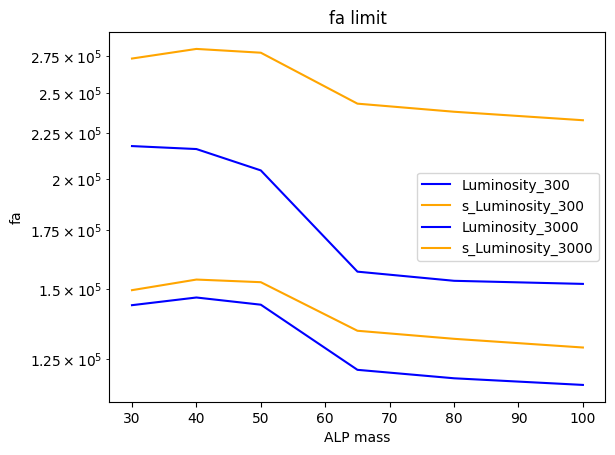

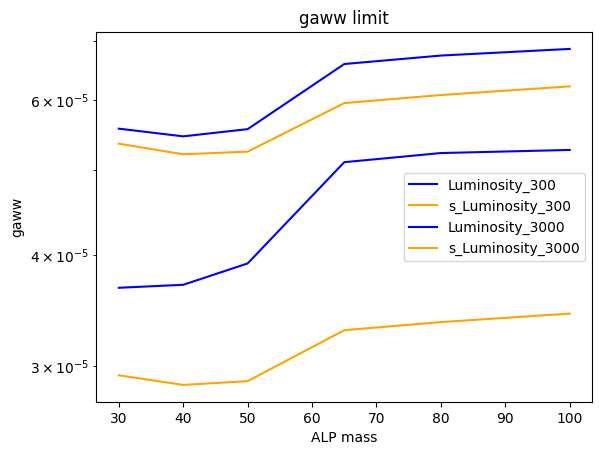

In [5]:
#big mass pic


plt.figure(1)
plt.plot(m_axlist,fa_limt_300,label='Luminosity_300',color = 'blue')
plt.plot(m_axlist,s_fa_limt_300,label='s_Luminosity_300',color = 'orange')
plt.plot(m_axlist,fa_limt_3000,label='Luminosity_3000',color = 'blue')
plt.plot(m_axlist,s_fa_limt_3000,label='s_Luminosity_3000',color = 'orange')

plt.title('fa limit')
plt.xlabel('ALP mass')
plt.ylabel('fa')
plt.yscale("log")
plt.legend(loc='best')
plt.show



plt.figure(2)
plt.plot(m_axlist,gaww_limt_300,label='Luminosity_300',color = 'blue')
plt.plot(m_axlist,s_gaww_limt_300,label='s_Luminosity_300',color = 'orange')
plt.plot(m_axlist,gaww_limt_3000,label='Luminosity_3000',color = 'blue')
plt.plot(m_axlist,s_gaww_limt_3000,label='s_Luminosity_3000',color = 'orange')
plt.title('gaww limit')
plt.xlabel('ALP mass')
plt.ylabel('gaww')
plt.yscale("log")
plt.legend(loc='best')
plt.show


In [6]:
# print('\033[0;34mfa\033[0m')
# print(fa_limt_300)
# print(fa_limt_3000)
# print('\033[0;34ms_fa\033[0m')
# print(s_fa_limt_300)
# print(s_fa_limt_3000)
# print('\033[0;34mgaww\033[0m')
# print(gaww_limt_300)
# print(gaww_limt_3000)
# print('\033[0;34ms_gaww\033[0m')
# print(s_gaww_limt_300)
# print(s_gaww_limt_3000)


#print('\033[0;34mfa\033[0m')
print('fa_limt_300 =',fa_limt_300)
print('fa_limt_3000 =',fa_limt_3000)
#print('\033[0;34ms_fa\033[0m')
print('s_fa_limt_300 =',s_fa_limt_300)
print('s_fa_limt_3000 =',s_fa_limt_3000)
#print('\033[0;34mgaww\033[0m')
print('gaww_limt_300 =',gaww_limt_300)
print('gaww_limt_3000 =',gaww_limt_3000)
#print('\033[0;34ms_gaww\033[0m')
print('s_gaww_limt_300 =',s_gaww_limt_300)
print('s_gaww_limt_3000 =',s_gaww_limt_3000)
print('m_axlist=',m_axlist)

fa_limt_300 = [116800.12205304063, 118838.39795459028, 121488.31929281104, 143971.25123797992, 146698.9129200724, 143791.92134995954]
fa_limt_3000 = [151993.87594780923, 153227.4268261075, 156924.33125573013, 204325.9067097686, 216031.26971232152, 217708.64002426006]
s_fa_limt_300 = [128767.62434116704, 131718.734244596, 134512.91719956897, 152672.55940035006, 153723.71797668657, 149530.53811651043]
s_fa_limt_3000 = [232885.06940693696, 238095.07156120345, 243170.8249807474, 277710.344525833, 280467.8620992236, 273529.59604865545]
gaww_limt_300 = [6.849307911139924e-05, 6.731830904567483e-05, 6.5849952049451e-05, 5.556664911369183e-05, 5.4533464773244286e-05, 5.5635948980260644e-05]
gaww_limt_3000 = [5.263369954949365e-05, 5.220997419136277e-05, 5.0979984658739006e-05, 3.915313593279911e-05, 3.703167606547523e-05, 3.674635971777937e-05]
s_gaww_limt_300 = [6.212741782673705e-05, 6.073547582946208e-05, 5.947384211533281e-05, 5.2399724164063876e-05, 5.204141628433202e-05, 5.35007771707917

In [7]:
# paste small mass fa gaww to this

d_fa_limt_300 = [272524.861251226, 309048.5398768291, 378697.7686757607, 303764.894020594, 3090.3270193318835]
d_fa_limt_3000 = [861799.2805752393, 838991.9171851488, 793853.962452253, 535565.1001515079, 3090.8189171178624]
d_s_fa_limt_300 = [272524.861251226, 420985.4374797337, 420788.15337167506, 307176.0308880635, 19573.524687304605]
d_s_fa_limt_3000 = [861799.2805752393, 848413.4017495407, 815909.799753317, 576812.4074177183, 34817.73732353346]
d_gaww_limt_300 = [2.935511998160502e-05, 2.588590129947998e-05, 2.1125025447006432e-05, 2.6336157197472704e-05, 0.0025887227953401413]
d_gaww_limt_3000 = [9.282904012939194e-06, 9.535252767202237e-06, 1.0077420254082522e-05, 1.4937493122193459e-05, 0.0025883108051699996]
d_s_gaww_limt_300 = [2.935511998160502e-05, 1.9003032617690298e-05, 1.901194208035067e-05, 2.604369871201064e-05, 0.00040871535034202615]
d_s_gaww_limt_3000 = [9.282904012939194e-06, 9.429365429050203e-06, 9.805005409199312e-06, 1.3869327180069703e-05, 0.00022976794631030678]
d_m_axlist= [25, 20, 10, 5, 1]
d_x_seclist = [10890, 11850, 14060, 15250, 15990]

d_s_list_300 = [222809.4, 286533.0, 430235.99999999994, 375607.5, 288299.7]
d_s_list_3000 = [2228094.0, 2865330.0, 4302360.0, 3756075.0000000005, 2882997.0]
d_b1_list_300 = [0.0, 0.28311000000000003, 0.84933, 2.8311, 25.19679]
d_b1_list_3000 = [0.0, 2.8311, 8.4933, 28.311000000000003, 251.96790000000001]
d_b2_list_300 = [0.0, 0.0, 0.0, 0.0, 141288.0]
d_b2_list_3000 = [0.0, 0.0, 0.0, 0.0, 1412880.0]
d_b_list_300 = [0.0, 0.28311000000000003, 0.84933, 2.8311, 141313.19679]
d_b_list_3000 = [0.0, 2.8311, 8.4933, 28.311000000000003, 1413131.9679]
# fa_limt_300.extend(fa300)
# fa_limt_3000.extend(fa3000)
# s_fa_limt_300.extend(s_fa300)
# s_fa_limt_3000.extend(s_fa3000)

# gaww_limt_300.extend(gaww300)
# gaww_limt_3000.extend(gaww3000)
# s_gaww_limt_300.extend(s_gaww300)
# s_gaww_limt_3000.extend(s_gaww3000)
# m_axlist.extend(M_ALP)

all_s_list_300 = []
all_s_list_3000 = []
all_b_list_300 = []
all_b_list_3000 = []
all_m_axlist = []
all_x_seclist = []

all_s_list_300.extend(s_list_300 + d_s_list_300)
all_s_list_3000.extend(s_list_3000 + d_s_list_3000)
all_b_list_300.extend(b_list_300 + d_b1_list_300)
all_b_list_3000.extend(b_list_3000 + d_b1_list_3000)
all_m_axlist.extend(m_axlist + d_m_axlist)
all_x_seclist.extend(x_seclist + d_x_seclist)
##############################################################################   copy to wang_chen
print('w_mass_large=',m_axlist)
print('g_aww_300_large =',s_gaww_limt_300)
print('error_g_aww_300_large =',gaww_limt_300)
print('g_aww_3k_large =',s_gaww_limt_3000)
print('error_g_aww_3k_large =',gaww_limt_3000)
print('')
print('w_mass_small=',d_m_axlist)
print('g_aww_300_small =',d_s_gaww_limt_300)
print('error_g_aww_300_small =',d_gaww_limt_300)
print('g_aww_3k_small =',d_s_gaww_limt_3000)
print('error_g_aww_3k_small =',d_gaww_limt_3000)
print('')
print('mass_w  =',all_m_axlist)
print('Xsection_w',all_x_seclist)
print('')
print('all_s_list_300 =',all_s_list_300)
print('all_s_list_3000 =',all_s_list_3000)
print('all_b_list_300 =',all_b_list_300)
print('all_b_list_3000 =',all_b_list_3000)

paper = []


w_mass_large= [100, 80, 65, 50, 40, 30]
g_aww_300_large = [6.212741782673705e-05, 6.073547582946208e-05, 5.947384211533281e-05, 5.2399724164063876e-05, 5.204141628433202e-05, 5.35007771707917e-05]
error_g_aww_300_large = [6.849307911139924e-05, 6.731830904567483e-05, 6.5849952049451e-05, 5.556664911369183e-05, 5.4533464773244286e-05, 5.5635948980260644e-05]
g_aww_3k_large = [3.435170842155201e-05, 3.360002350129941e-05, 3.289868346925823e-05, 2.8806993177223292e-05, 2.8523767180033515e-05, 2.924729212328804e-05]
error_g_aww_3k_large = [5.263369954949365e-05, 5.220997419136277e-05, 5.0979984658739006e-05, 3.915313593279911e-05, 3.703167606547523e-05, 3.674635971777937e-05]

w_mass_small= [25, 20, 10, 5, 1]
g_aww_300_small = [2.935511998160502e-05, 1.9003032617690298e-05, 1.901194208035067e-05, 2.604369871201064e-05, 0.00040871535034202615]
error_g_aww_300_small = [2.935511998160502e-05, 2.588590129947998e-05, 2.1125025447006432e-05, 2.6336157197472704e-05, 0.0025887227953401413]
g_aww_3

<function matplotlib.pyplot.show(close=None, block=None)>

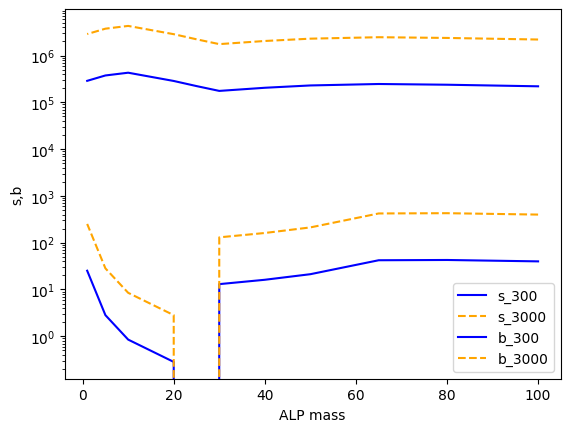

In [15]:
plt.figure(1)

plt.plot(all_m_axlist ,all_s_list_300 ,label='s_300',color = 'blue')
plt.plot(all_m_axlist ,all_s_list_3000 ,label='s_3000',color = 'orange',linestyle='dashed')
plt.plot(all_m_axlist ,all_b_list_300 ,label='b_300',color = 'blue')
plt.plot(all_m_axlist ,all_b_list_3000 ,label='b_3000',color = 'orange',linestyle='dashed')

plt.xlabel('ALP mass')
plt.ylabel('s,b')
plt.yscale("log")
plt.legend(loc='best')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

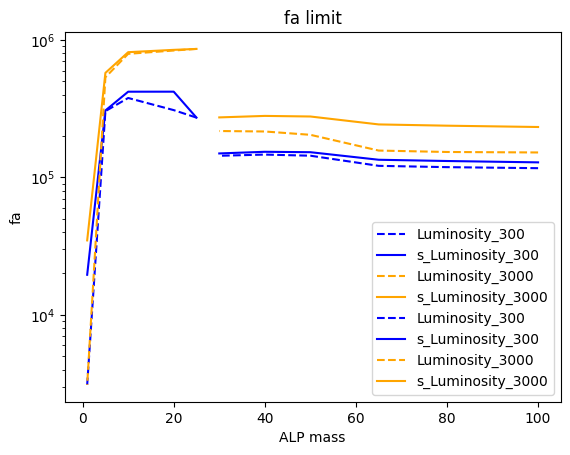

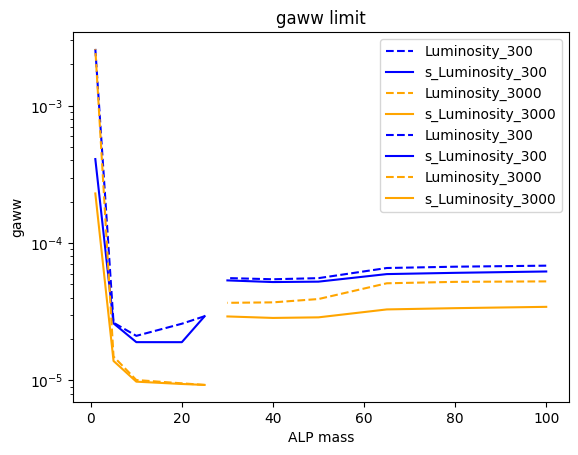

In [9]:
#draw all pic (small mass and big mass)

plt.figure(1)
plt.plot(m_axlist,fa_limt_300,label='Luminosity_300',color = 'blue',linestyle='dashed')
plt.plot(m_axlist,s_fa_limt_300,label='s_Luminosity_300',color = 'blue')
plt.plot(m_axlist,fa_limt_3000,label='Luminosity_3000',color = 'orange',linestyle='dashed')
plt.plot(m_axlist,s_fa_limt_3000,label='s_Luminosity_3000',color = 'orange')

plt.plot(d_m_axlist,d_fa_limt_300,label='Luminosity_300',color = 'blue',linestyle='dashed')
plt.plot(d_m_axlist,d_s_fa_limt_300,label='s_Luminosity_300',color = 'blue')
plt.plot(d_m_axlist,d_fa_limt_3000,label='Luminosity_3000',color = 'orange',linestyle='dashed')
plt.plot(d_m_axlist,d_s_fa_limt_3000,label='s_Luminosity_3000',color = 'orange')

plt.title('fa limit')
plt.xlabel('ALP mass')
plt.ylabel('fa')
plt.yscale("log")
plt.legend(loc='best')
plt.show



plt.figure(2)
plt.plot(m_axlist,gaww_limt_300,label='Luminosity_300',color = 'blue',linestyle='dashed')
plt.plot(m_axlist,s_gaww_limt_300,label='s_Luminosity_300',color = 'blue')
plt.plot(m_axlist,gaww_limt_3000,label='Luminosity_3000',color = 'orange',linestyle='dashed')
plt.plot(m_axlist,s_gaww_limt_3000,label='s_Luminosity_3000',color = 'orange')

plt.plot(d_m_axlist,d_gaww_limt_300,label='Luminosity_300',color = 'blue',linestyle='dashed')
plt.plot(d_m_axlist,d_s_gaww_limt_300,label='s_Luminosity_300',color = 'blue')
plt.plot(d_m_axlist,d_gaww_limt_3000,label='Luminosity_3000',color = 'orange',linestyle='dashed')
plt.plot(d_m_axlist,d_s_gaww_limt_3000,label='s_Luminosity_3000',color = 'orange')

plt.title('gaww limit')
plt.xlabel('ALP mass')
plt.ylabel('gaww')
plt.yscale("log")
plt.legend(loc='best')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

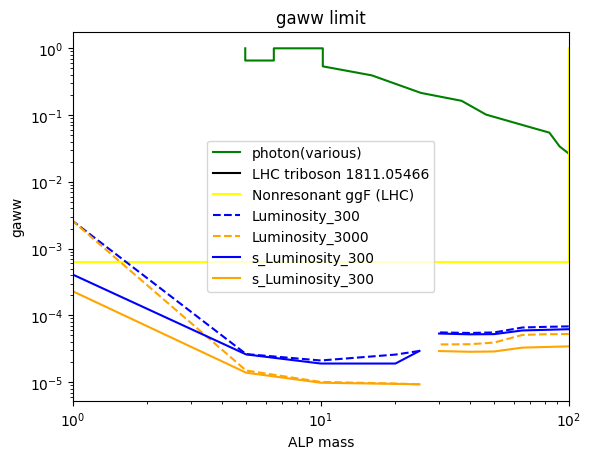

In [10]:
df = pd.read_csv("/data/excel/test.csv")

mass_list = df["mass(GeV)"].to_list()
gaww_list = df["gaww(GeV^-1)"].to_list()
G_mass_list = df["G_mass(GeV)"].to_list()
G_gaww_list = df["G_gaww(GeV^-1)"].to_list()
T_mass_list = df["T_mass(GeV)"].to_list()
T_gaww_list = df["T_gaww(GeV^-1)"].to_list()
N_mass_list = df["N_mass(GeV)"].to_list()
N_gaww_list = df["N_gaww(GeV^-1)"].to_list()



plt.figure(1)
plt.plot(mass_list,gaww_list,color = 'green',label='photon(various)')
#plt.plot(G_mass_list,G_gaww_list,color = 'black',label='g.i.')
plt.plot(T_mass_list,T_gaww_list,color = 'black',label='LHC triboson 1811.05466')
plt.plot(N_mass_list,N_gaww_list,color = 'yellow',label='Nonresonant ggF (LHC)')

plt.plot(m_axlist,gaww_limt_300,label='Luminosity_300',color = 'blue',linestyle='dashed')
plt.plot(m_axlist,gaww_limt_3000,label='Luminosity_3000',color = 'orange',linestyle='dashed')
plt.plot(m_axlist,s_gaww_limt_300,label='s_Luminosity_300',color = 'blue')
plt.plot(m_axlist,s_gaww_limt_3000,label='s_Luminosity_300',color = 'orange')

plt.plot(d_m_axlist,d_gaww_limt_300,color = 'blue',linestyle='dashed')
plt.plot(d_m_axlist,d_gaww_limt_3000,color = 'orange',linestyle='dashed')
plt.plot(d_m_axlist,d_s_gaww_limt_300,color = 'blue')
plt.plot(d_m_axlist,d_s_gaww_limt_3000,color = 'orange')

plt.title('gaww limit')
plt.xlabel('ALP mass')
plt.ylabel('gaww')
plt.xscale("log")
plt.yscale("log")
plt.xlim(1,100) #
plt.legend(loc='best')
plt.show

No handles with labels found to put in legend.


ALPmass = [100, 80, 65, 50, 40, 30]
X_section = [4584, 5583, 6640, 7858, 8969, 10220]


<function matplotlib.pyplot.show(close=None, block=None)>

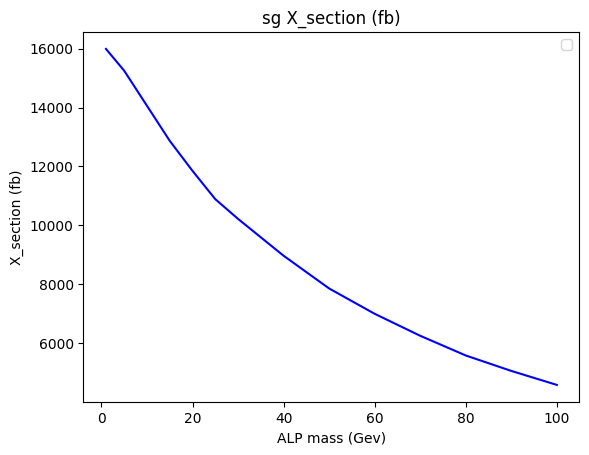

In [11]:
# draw sg_x_section

b_m_axlist = [100,90,80,70,60,50,40,30]
b_x_seclist = [4584, 5059, 5583, 6252, 6998, 7858, 8969, 10220]

s_m_axlist = [1, 5, 10, 15, 20, 25]
s_x_seclist = [15990, 15250, 14060, 12870, 11850, 10890]

s_m_axlist.reverse()
s_x_seclist.reverse()

b_m_axlist.extend(s_m_axlist)
b_x_seclist.extend(s_x_seclist)

print('ALPmass =',m_axlist)
print('X_section =',x_seclist)


plt.figure(1)
plt.plot(b_m_axlist,b_x_seclist,color = 'blue')
plt.title('sg X_section (fb)')
plt.xlabel('ALP mass (Gev)')
plt.ylabel('X_section (fb)')
plt.legend(loc='best')
plt.show

In [12]:
# m_axlist = [100,90,80,70,60,50,40,30]

# print('L300s',L300s)
# print('L3000s',L3000s)
# print('L300b',L300b)
# print('L3000b',L3000b)
# print(m_axlist)



# plt.figure(1, figsize=(18,14))
# plt.subplots_adjust(wspace=0.25)


# ax1 = plt.subplot(221)
# ax1.plot(m_axlist,L300s,color = 'blue',label = "L300s")
# plt.title('s,b')
# plt.ylabel(r"nomalized $\frac{dN}{dx}$")
# plt.xlabel('ALP mass')
# plt.legend(loc='best')
# plt.show

# ax2 = plt.subplot(222)
# ax2.plot(m_axlist,L3000s,color = 'orange',label = "L3000s")
# plt.title('s,b')
# plt.ylabel(r"nomalized $\frac{dN}{dx}$")
# plt.xlabel('ALP mass')
# plt.legend(loc='best')
# plt.show

# ax3 = plt.subplot(223)
# ax3.plot(m_axlist,L300b,color = 'blue',label = "L300b")
# plt.title('s,b')
# plt.ylabel(r"nomalized $\frac{dN}{dx}$")
# plt.xlabel('ALP mass')
# plt.legend(loc='best')
# plt.show

# ax4 = plt.subplot(224)
# ax4.plot(m_axlist,L3000b,color = 'orange',label = "L3000b")
# plt.title('s,b')
# plt.ylabel(r"nomalized $\frac{dN}{dx}$")
# plt.xlabel('ALP mass')
# plt.legend(loc='best')
# plt.show



